In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from datetime import datetime

# 1.Data Collection

In [3]:
now = datetime.now()

start = datetime(now.year-10, now.month , now.day)
end = now
ticker = 'AAPL'
df = yf.download(ticker,start,end)
df

C:\Users\jayasimha\AppData\Local\Temp\ipykernel_18632\3004192401.py:6: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker,start,end)
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2015-11-30,26.672977,26.923248,26.548969,26.603081,156721200
2015-12-01,26.456526,26.787965,26.348302,26.774438,139409600
2015-12-02,26.217527,26.630136,26.172434,26.456524,133546400
2015-12-03,25.974022,26.332518,25.753063,26.278406,166278000
2015-12-04,26.837564,26.887168,25.953727,25.994311,231108000
...,...,...,...,...,...
2025-11-21,271.489990,273.329987,265.670013,265.950012,59030800
2025-11-24,275.920013,277.000000,270.899994,270.899994,65585800


In [12]:
df.head()

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2015-11-30,26.672977,26.923248,26.548969,26.603081,156721200
2015-12-01,26.456530,26.787969,26.348305,26.774442,139409600
2015-12-02,26.217529,26.630138,26.172436,26.456526,133546400
2015-12-03,25.974020,26.332516,25.753061,26.278404,166278000
2015-12-04,26.837566,26.887170,25.953729,25.994313,231108000


 # 2.Data Exploration & Visualization

In [13]:
type(df)

pandas.core.frame.DataFrame

In [14]:
df.shape

(2515, 5)

In [15]:
df.isna().sum()

Price   Ticker
Close   AAPL      0
High    AAPL      0
Low     AAPL      0
Open    AAPL      0
Volume  AAPL      0
dtype: int64

In [16]:
df.describe()

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
count,2515.000000,2515.000000,2515.000000,2515.000000,2.515000e+03
mean,112.059196,113.177159,110.829095,111.949396,1.028920e+08
std,72.218694,72.917698,71.443963,72.136463,5.832161e+07
min,20.604080,20.907418,20.405658,20.526537,7.169616e+06
25%,41.106655,41.349369,40.788722,41.001133,6.298645e+07
50%,117.769501,119.557564,116.169925,117.797479,8.973840e+07
75%,170.959702,171.993860,168.769641,170.397030,1.261520e+08
max,277.549988,280.380005,276.630005,277.260010,5.334788e+08


In [18]:
df.dtypes

Price   Ticker
Close   AAPL      float64
High    AAPL      float64
Low     AAPL      float64
Open    AAPL      float64
Volume  AAPL        int64
dtype: object

In [19]:
df = df.reset_index()

In [20]:
df.head()

Price,Date,Close,High,Low,Open,Volume
Ticker,,AAPL,AAPL,AAPL,AAPL,AAPL
0,2015-11-30,26.672977,26.923248,26.548969,26.603081,156721200
1,2015-12-01,26.456530,26.787969,26.348305,26.774442,139409600
2,2015-12-02,26.217529,26.630138,26.172436,26.456526,133546400
3,2015-12-03,25.974020,26.332516,25.753061,26.278404,166278000
4,2015-12-04,26.837566,26.887170,25.953729,25.994313,231108000


Text(0.5, 1.0, 'title')

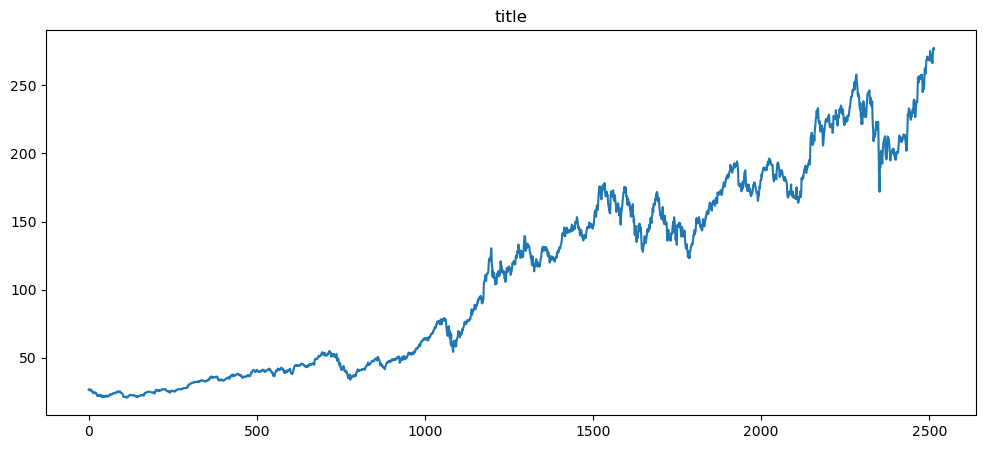

In [23]:
plt.figure(figsize=(12,5))
plt.plot(df.Close)
plt.title('title')

# Feature Engineering

In [24]:
df1 = pd.DataFrame([10,20,30,40,50,60,70,80,90,100])
df1

,0
0,10
1,20
2,30
3,40
4,50
5,60
6,70
7,80
8,90
9,100


In [25]:
df1['MA_5'] = df1.rolling(5).mean()
df1

,0,MA_5
0,10,NaN
1,20,NaN
2,30,NaN
3,40,NaN
4,50,30.0
5,60,40.0
6,70,50.0
7,80,60.0
8,90,70.0
9,100,80.0


# 100 Days Moving Average

In [32]:
df['MA_100'] = df.Close.rolling(100).mean()
df.head()


Price,Date,Close,High,Low,Open,Volume,MA_100,MA_200
Ticker,,AAPL,AAPL,AAPL,AAPL,AAPL,,
0,2015-11-30,26.672977,26.923248,26.548969,26.603081,156721200,NaN,NaN
1,2015-12-01,26.456530,26.787969,26.348305,26.774442,139409600,NaN,NaN
2,2015-12-02,26.217529,26.630138,26.172436,26.456526,133546400,NaN,NaN
3,2015-12-03,25.974020,26.332516,25.753061,26.278404,166278000,NaN,NaN
4,2015-12-04,26.837566,26.887170,25.953729,25.994313,231108000,NaN,NaN


In [27]:
df.head(103)

Price,Date,Close,High,Low,Open,Volume,MA_100
Ticker,,AAPL,AAPL,AAPL,AAPL,AAPL,
0,2015-11-30,26.672977,26.923248,26.548969,26.603081,156721200,NaN
1,2015-12-01,26.456530,26.787969,26.348305,26.774442,139409600,NaN
2,2015-12-02,26.217529,26.630138,26.172436,26.456526,133546400,NaN
3,2015-12-03,25.974020,26.332516,25.753061,26.278404,166278000,NaN
4,2015-12-04,26.837566,26.887170,25.953729,25.994313,231108000,NaN
...,...,...,...,...,...,...,...
98,2016-04-21,24.022593,24.240217,23.920580,24.240217,126210000,NaN
99,2016-04-22,23.956854,24.138208,23.716560,23.804970,134732400,23.520247
100,2016-04-25,23.820841,23.950055,23.691626,23.802705,112126400,23.491726


In [33]:
df['MA_200'] = df.Close.rolling(200).mean()
df.head()

Price,Date,Close,High,Low,Open,Volume,MA_100,MA_200
Ticker,,AAPL,AAPL,AAPL,AAPL,AAPL,,
0,2015-11-30,26.672977,26.923248,26.548969,26.603081,156721200,NaN,NaN
1,2015-12-01,26.456530,26.787969,26.348305,26.774442,139409600,NaN,NaN
2,2015-12-02,26.217529,26.630138,26.172436,26.456526,133546400,NaN,NaN
3,2015-12-03,25.974020,26.332516,25.753061,26.278404,166278000,NaN,NaN
4,2015-12-04,26.837566,26.887170,25.953729,25.994313,231108000,NaN,NaN


Text(0.5, 1.0, '100,200 days Moving Average')

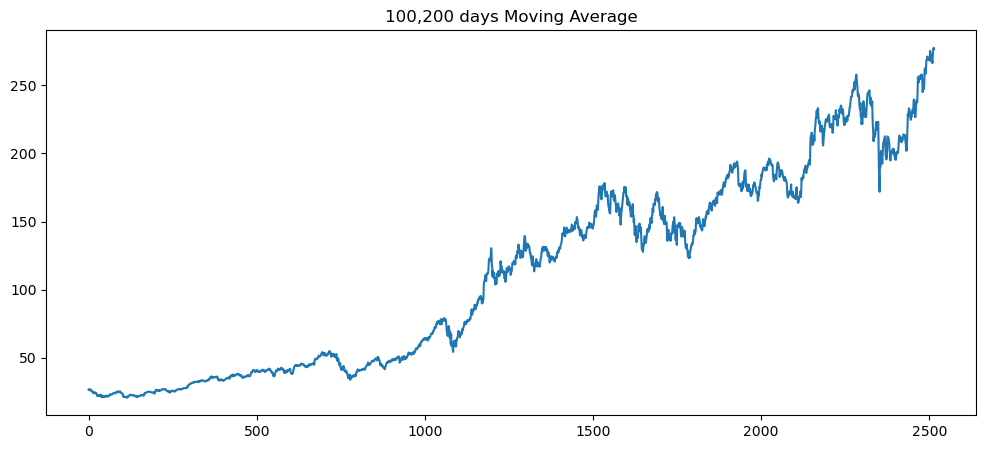

In [39]:
plt.figure(figsize=(12,5))
plt.plot(df.Close)
plt.plot(df['MA_100'],'r')
plt.plot(df['MA_200'],'g')
plt.title('100,200 days Moving Average')




In [40]:
df

Price,Date,Close,High,Low,Open,Volume,MA_100,MA_200
Ticker,,AAPL,AAPL,AAPL,AAPL,AAPL,,
0,2015-11-30,26.672977,26.923248,26.548969,26.603081,156721200,NaN,NaN
1,2015-12-01,26.456530,26.787969,26.348305,26.774442,139409600,NaN,NaN
2,2015-12-02,26.217529,26.630138,26.172436,26.456526,133546400,NaN,NaN
3,2015-12-03,25.974020,26.332516,25.753061,26.278404,166278000,NaN,NaN
4,2015-12-04,26.837566,26.887170,25.953729,25.994313,231108000,NaN,NaN
...,...,...,...,...,...,...,...,...
2510,2025-11-21,271.489990,273.329987,265.670013,265.950012,59030800,NaN,NaN
2511,2025-11-24,275.920013,277.000000,270.899994,270.899994,65585800,NaN,NaN
2512,2025-11-25,276.970001,280.380005,275.250000,275.269989,46914200,NaN,NaN


### Calculating Percentage in Each Trading

In [42]:
df['Percentage Changed'] = df.Close.pct_change()
df[['Close','Percentage Changed']]

Price,Close,Percentage Changed
Ticker,AAPL,
0,26.672977,NaN
1,26.456530,-0.008115
2,26.217529,-0.009034
3,25.974020,-0.009288
4,26.837566,0.033247
...,...,...
2510,271.489990,0.019681
2511,275.920013,0.016317
2512,276.970001,0.003805


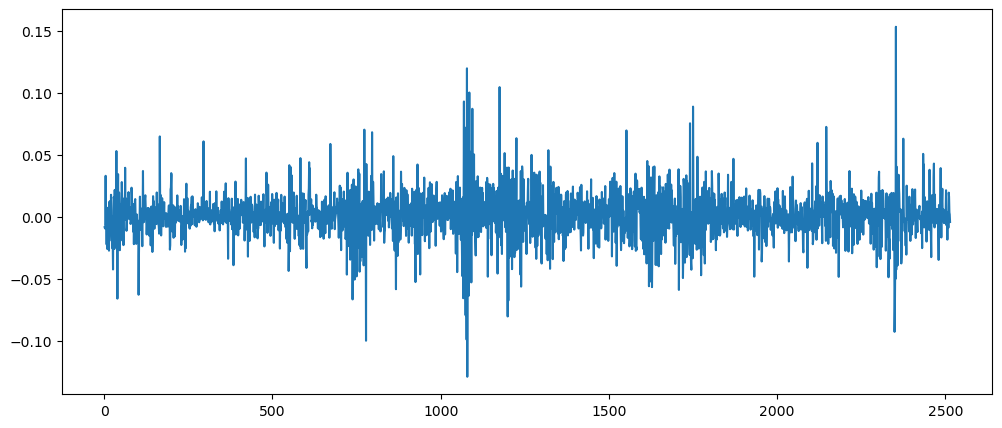

In [43]:
plt.figure(figsize=(12,5))
plt.plot(df['Percentage Changed'])

# Data Preprocessing

In [4]:
df.shape


(2515, 5)

In [64]:
# Splitting the Data
data_training = pd.DataFrame(df.Close[0:int(len(df)*0.7)])
data_testing = pd.DataFrame(df.Close[int(len(df)*0.7):int(len(df))])
print(data_training)
print(data_testing)

Ticker            AAPL
Date                  
2015-11-30   26.672974
2015-12-01   26.456524
2015-12-02   26.217529
2015-12-03   25.974020
2015-12-04   26.837561
...                ...
2022-11-17  148.480011
2022-11-18  149.041504
2022-11-21  145.810287
2022-11-22  147.948013
2022-11-23  148.824814

[1760 rows x 1 columns]
Ticker            AAPL
Date                  
2022-11-25  145.908783
2022-11-28  142.076584
2022-11-29  139.071945
2022-11-30  145.829971
2022-12-01  146.105820
...                ...
2025-11-21  271.489990
2025-11-24  275.920013
2025-11-25  276.970001
2025-11-26  277.549988
2025-11-28  278.850006

[755 rows x 1 columns]


In [7]:
# Scaling down the Data between 0 and 1

In [11]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [13]:
data_training_array = scaler.fit_transform(data_training)
print(data_training_array)

[[0.03849205]
 [0.0371192 ]
 [0.03560335]
 ...
 [0.79412197]
 [0.80768052]
 [0.81324154]]


In [14]:
type(data_training_array)

numpy.ndarray

In [15]:
data_training_array.shape

(1760, 1)

# Sequence Creation

In [19]:
x_train = []
y_train = []
for i in range (100,data_training_array.shape[0]):
    x_train.append(data_training_array[i-100 : i])
    y_train.append(data_training_array[i,0])
x_train, y_train = np.array(x_train), np.array(y_train)

In [20]:
x_train

array([[[0.03849205],
        [0.0371192 ],
        [0.03560335],
        ...,
        [0.0233498 ],
        [0.02168199],
        [0.02126499]],

       [[0.0371192 ],
        [0.03560335],
        [0.03405892],
        ...,
        [0.02168199],
        [0.02126499],
        [0.02040231]],

       [[0.03560335],
        [0.03405892],
        [0.03953595],
        ...,
        [0.02126499],
        [0.02040231],
        [0.01935273]],

       ...,

       [[0.72098147],
        [0.734748  ],
        [0.75113105],
        ...,
        [0.79899547],
        [0.81105463],
        [0.81461619]],

       [[0.734748  ],
        [0.75113105],
        [0.75960271],
        ...,
        [0.81105463],
        [0.81461619],
        [0.79412197]],

       [[0.75113105],
        [0.75960271],
        [0.7809692 ],
        ...,
        [0.81461619],
        [0.79412197],
        [0.80768052]]], shape=(1660, 100, 1))

In [21]:
x_train.ndim


3

In [22]:
y_train.ndim

1

In [23]:
x_train.shape


(1660, 100, 1)

In [24]:
y_train.shape

(1660,)

 # Model Building

In [26]:
import tensorflow as tf
print(tf.__version__)

2.20.0


In [27]:
 # ML_Model
from keras.models import Sequential
from keras.layers import Dense,LSTM,Input

In [28]:
model = Sequential()
model.add(Input(shape=(100,1)))
model.add(LSTM(units=128, activation='tanh',return_sequences=True))
model.add(LSTM(units=64))
model.add(Dense(25))
model.add(Dense(1))

# Model Training

In [29]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train,y_train,epochs=50)

Epoch 1/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 11s 113ms/step - loss: 0.0093
Epoch 2/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 6s 114ms/step - loss: 7.1183e-04
Epoch 3/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 6s 112ms/step - loss: 5.8853e-04
Epoch 4/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 6s 113ms/step - loss: 6.2776e-04
Epoch 5/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 6s 113ms/step - loss: 6.0628e-04
Epoch 6/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 6s 121ms/step - loss: 5.2321e-04
Epoch 7/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 6s 114ms/step - loss: 5.3569e-04
Epoch 8/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 6s 115ms/step - loss: 4.8669e-04
Epoch 9/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 6s 114ms/step - loss: 5.0564e-04
Epoch 10/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 6s 114ms/step - loss: 4.7563e-04
Epoch 11/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 7s 136ms/step - loss: 4.3706e-04
Epoch 12/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 6s 115ms/step - loss: 5.4532e-04
Epoch 13/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 6s 117ms/step - loss: 4.1842e-04
Epoch 14/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 6s 116ms/step - loss: 4.5809e-04
Epoc

In [30]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 100, 128)            │          66,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 64)                  │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 25)                  │           1,625 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              26 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 352,859 (1.35 MB)

 Trainable params: 117,619 (459.45 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 235,240 (918.91 KB)

In [31]:
# Save the trained Model
model.save('stock_prediction_model.keras')

# Preparing The Test_Data

In [65]:
data_testing

Ticker,AAPL
Date,
2022-11-25,145.908783
2022-11-28,142.076584
2022-11-29,139.071945
2022-11-30,145.829971
2022-12-01,146.105820
...,...
2025-11-21,271.489990
2025-11-24,275.920013
2025-11-25,276.970001


In [32]:
past_100_days = data_training.tail(100)

In [33]:
past_100_days

Ticker,AAPL
Date,
2022-07-06,140.367752
2022-07-07,143.736526
2022-07-08,144.414154
2022-07-11,142.282959
2022-07-12,143.255264
...,...
2022-11-17,148.479980
2022-11-18,149.041519
2022-11-21,145.810272


In [69]:
final_df = pd.concat([past_100_days, data_testing],ignore_index=True)
final_df

Ticker,AAPL
0,140.367752
1,143.736526
2,144.414154
3,142.282959
4,143.255264
...,...
850,271.489990
851,275.920013
852,276.970001
853,277.549988


In [70]:
input_data = scaler.fit_transform(final_df)
input_data

array([[1.10514641e-01],
       [1.32152616e-01],
       [1.36505085e-01],
       [1.22816206e-01],
       [1.29061420e-01],
       [1.26727441e-01],
       [1.45526299e-01],
       [1.56250609e-01],
       [1.36694536e-01],
       [1.61486628e-01],
       [1.74355664e-01],
       [1.88928091e-01],
       [1.80979682e-01],
       [1.73787997e-01],
       [1.65271627e-01],
       [1.98012128e-01],
       [2.01544951e-01],
       [2.34096295e-01],
       [2.27787768e-01],
       [2.18325123e-01],
       [2.56932525e-01],
       [2.54913937e-01],
       [2.53461056e-01],
       [2.50428764e-01],
       [2.50744744e-01],
       [2.78034784e-01],
       [2.73296944e-01],
       [2.96102007e-01],
       [3.02987512e-01],
       [3.01976944e-01],
       [3.11578761e-01],
       [3.09051998e-01],
       [2.92437852e-01],
       [2.67485124e-01],
       [2.65337263e-01],
       [2.67232458e-01],
       [2.83025486e-01],
       [2.42532201e-01],
       [2.28381896e-01],
       [2.12778515e-01],


In [71]:
x_test = []
y_test = []
for i in range(100,input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i,0])

In [72]:
x_test,y_test = np.array(x_test),np.array(y_test)

In [73]:
x_test

array([[[0.11051464],
        [0.13215262],
        [0.13650509],
        ...,
        [0.14547249],
        [0.15920332],
        [0.164835  ]],

       [[0.13215262],
        [0.13650509],
        [0.12281621],
        ...,
        [0.15920332],
        [0.164835  ],
        [0.14610524]],

       [[0.13650509],
        [0.12281621],
        [0.12906142],
        ...,
        [0.164835  ],
        [0.14610524],
        [0.12149064]],

       ...,

       [[0.55461512],
        [0.5549997 ],
        [0.56224255],
        ...,
        [0.9190689 ],
        [0.95272588],
        [0.98118036]],

       [[0.5549997 ],
        [0.56224255],
        [0.57038286],
        ...,
        [0.95272588],
        [0.98118036],
        [0.98792454]],

       [[0.56224255],
        [0.57038286],
        [0.56237074],
        ...,
        [0.98118036],
        [0.98792454],
        [0.99164985]]], shape=(755, 100, 1))

In [74]:
y_predicted = model.predict(x_test)

24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 82ms/step


In [75]:
y_predicted

array([[0.1566591 ],
       [0.15331867],
       [0.14196786],
       [0.12627366],
       [0.12709543],
       [0.13319306],
       [0.1381771 ],
       [0.1390311 ],
       [0.13123311],
       [0.11960331],
       [0.11349115],
       [0.10991438],
       [0.11247971],
       [0.11802175],
       [0.1185779 ],
       [0.10507844],
       [0.08797988],
       [0.07110102],
       [0.05894404],
       [0.05688294],
       [0.05327998],
       [0.04947556],
       [0.04358043],
       [0.03207745],
       [0.02741115],
       [0.02678275],
       [0.01986926],
       [0.01456136],
       [0.00909224],
       [0.01207962],
       [0.01816661],
       [0.02461591],
       [0.03398364],
       [0.04173831],
       [0.04907911],
       [0.05629054],
       [0.06020797],
       [0.06206337],
       [0.06727634],
       [0.07791466],
       [0.0899527 ],
       [0.09777784],
       [0.10588728],
       [0.11541146],
       [0.11699166],
       [0.11816142],
       [0.12103306],
       [0.133

In [77]:
y_predicted = scaler.inverse_transform(y_predicted.reshape(-1,1)).flatten()
y_test =  scaler.inverse_transform(y_test.reshape(-1,1)).flatten()

In [78]:
y_predicted

array([147.5519  , 147.03183 , 145.26465 , 142.82124 , 142.94919 ,
       143.89851 , 144.67447 , 144.80742 , 143.59337 , 141.78275 ,
       140.83116 , 140.2743  , 140.67369 , 141.53651 , 141.62311 ,
       139.5214  , 136.85936 , 134.23152 , 132.33882 , 132.01794 ,
       131.457   , 130.8647  , 129.9469  , 128.15602 , 127.42953 ,
       127.3317  , 126.25535 , 125.42898 , 124.57749 , 125.042595,
       125.99027 , 126.99435 , 128.45279 , 129.6601  , 130.80296 ,
       131.9257  , 132.53561 , 132.82446 , 133.63606 , 135.29233 ,
       137.1665  , 138.3848  , 139.64732 , 141.13013 , 141.37614 ,
       141.55826 , 142.00534 , 144.02113 , 147.06116 , 148.60072 ,
       150.13795 , 150.28651 , 149.6604  , 149.13869 , 149.72174 ,
       150.2391  , 151.27602 , 151.60747 , 151.26637 , 149.5593  ,
       148.17528 , 147.47475 , 146.37614 , 145.88997 , 145.57986 ,
       144.78894 , 144.28139 , 145.54909 , 147.8324  , 149.00372 ,
       149.86589 , 149.61406 , 148.46217 , 148.03549 , 148.613

In [79]:
y_test

array([145.90878296, 142.07658386, 139.07194519, 145.82997131,
       146.1058197 , 145.61325073, 144.45077515, 140.78607178,
       138.84535217, 140.52993774, 140.04722595, 142.34259033,
       143.30801392, 141.08163452, 134.47132874, 132.51092529,
       130.40270996, 130.33374023, 133.43692017, 130.26477051,
       129.90028381, 128.0974884 , 124.16678619, 127.68373108,
       127.99895477, 123.21120453, 124.48204803, 123.16194153,
       127.69354248, 128.21568298, 128.78707886, 131.50605774,
       131.42724609, 132.75718689, 133.91964722, 133.20053101,
       133.2596283 , 135.82093811, 139.01283264, 140.41172791,
       139.75167847, 141.82048035, 143.76116943, 140.8747406 ,
       142.14555359, 143.26861572, 148.57853699, 152.20381165,
       149.47499084, 152.35157776, 149.66215515, 148.62776184,
       148.99281311, 151.79492188, 151.15357971, 153.25512695,
       151.65675354, 150.51223755, 146.49659729, 146.92088318,
       147.40434265, 144.7502594 , 145.94410706, 145.44

(140.0, 220.0)

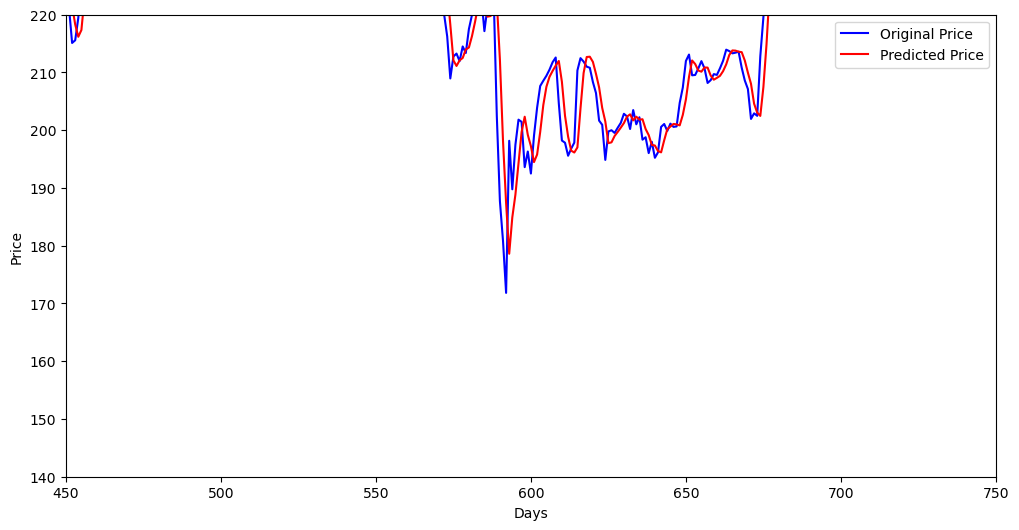

In [83]:
plt.figure(figsize=(12,6))
plt.plot(y_test, 'b', label='Original Price')
plt.plot(y_predicted, 'r', label='Predicted Price')
plt.xlabel('Days')
plt.ylabel('Price')
plt.legend()
plt.xlim(450,750)
plt.ylim(140,220)


# Model Evalution

In [91]:
# Mean Squared Error
from sklearn.metrics import mean_squared_error,r2_score

In [86]:
mse = mean_squared_error(y_test,y_predicted)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 15.095052977426699


In [87]:
# Root Mean_Square_Error

In [88]:
rmse = np.sqrt(mse)
print(f"Root Mean Square Error:{rmse}")

Root Mean Square Error:3.8852352538072514


In [92]:
 # R-Squared
r2=r2_score(y_test,y_predicted)
print(f"r-squared : {r2}")

r-squared : 0.9868134345438259
